p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.728e-35 stat=1.546e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.217e-30 stat=1.324e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Kruskal-Wallis paired samples with Bonferroni correction, P_val=3.697e-36 stat=1.576e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Custom statistical test, P_val:0.

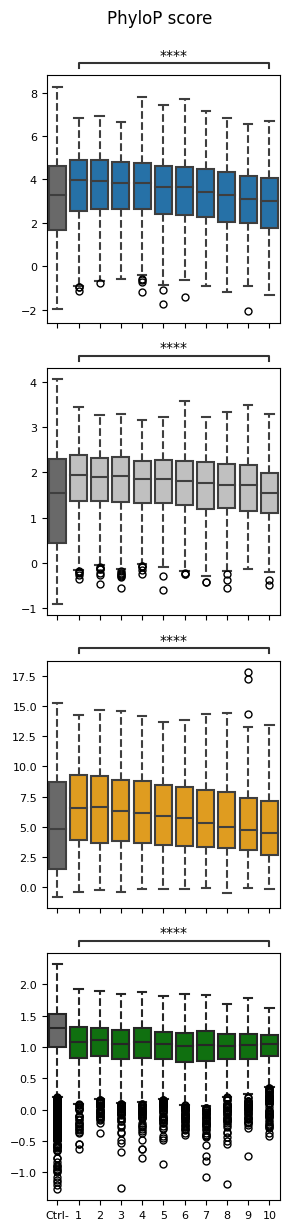

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from statannot import add_stat_annotation
matplotlib.rcParams['pdf.fonttype'] = 42

# Load both datasets
df1 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)
df2 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_mm39.tsv", sep='\t', header=0)
df3 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_dm6.tsv", sep='\t', header=0)
df4 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_tair10.tsv", sep='\t', header=0)

neg_hg = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/evolution_pressure/hg38_ctrlneg_phylop.bed") as file:
    for line in file:    
        neg_hg.append(float(line.strip().split("\t")[6]))
neg_mm = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/evolution_pressure/mm39_ctrlneg_phylop.bed") as file:
    for line in file:    
        neg_mm.append(float(line.strip().split("\t")[6]))
neg_dm = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/evolution_pressure/dm6_ctrlneg_phylop.bed") as file:
    for line in file:    
        neg_dm.append(float(line.strip().split("\t")[6]))
neg_tair = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/evolution_pressure/tair10_ctrlneg_phylop.bed") as file:
    for line in file:    
        neg_tair.append(float(line.strip().split("\t")[6]))

# Create a DataFrame for the control group
df_control = pd.DataFrame({'GroupByTF': ['Ctrl-'] * len(neg_hg),"PhyloP":neg_hg})
df1_2 = pd.concat([df1, df_control])
df_control = pd.DataFrame({'GroupByTF': ['Ctrl-'] * len(neg_mm),"PhyloP": neg_mm})
df2_2 = pd.concat([df2, df_control])
df_control = pd.DataFrame({'GroupByTF': ['Ctrl-'] * len(neg_dm),"PhyloP": neg_dm})
df3_2 = pd.concat([df3, df_control])
df_control = pd.DataFrame({'GroupByTF': ['Ctrl-'] * len(neg_tair),"PhyloP": neg_tair})
df4_2 = pd.concat([df4, df_control])

# Define the columns of interest
columns_of_interest = ['PhyloP']

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(4, 1, figsize=(3, 12), sharey=False, sharex=True)


# Top row: Plot for first dataset (df1)
data1 = df1_2[["GroupByTF", 'PhyloP']].dropna()
sns.boxplot(
    data=data1, 
    x='GroupByTF', 
    y='PhyloP', 
    palette=['dimgrey'] + ['#1175BC']*10,  # first box gray, others red
    showfliers=True,    
    linewidth=1.5,       
    whiskerprops={'linestyle': '--'},
    flierprops={
        'marker': 'o',        
        'markerfacecolor': 'none',  
        'markeredgecolor': 'black', 
        'markersize': 5       
    },
    
    ax=axes[0],order=['Ctrl-'] + list(range(1, 11))
)
axes[0].set_title(None)
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)
axes[0].tick_params(axis='x', labelsize=8)
axes[0].tick_params(axis='y', labelsize=8)

add_stat_annotation(
    ax=axes[0],
    data=data1,
    x='GroupByTF',
    y='PhyloP',
    box_pairs=[(1, 10)],
    order=['Ctrl-'] + list(range(1, 11)),
    test='Kruskal',
    text_format='star',
    loc='outside'
)


# Bottom row: Plot for second dataset (df2)
data2 = df2_2[["GroupByTF", 'PhyloP']].dropna()
sns.boxplot(
    data=data2, 
    x='GroupByTF', 
    y='PhyloP', 
    palette=['dimgrey'] + ['silver']*10, 
    showfliers=True,    
    linewidth=1.5,       
    whiskerprops={'linestyle': '--'},
    flierprops={
        'marker': 'o',        
        'markerfacecolor': 'none',  
        'markeredgecolor': 'black', 
        'markersize': 5       
    },
    ax=axes[1],order=['Ctrl-'] + list(range(1, 11))
)
axes[1].set_title(None)
axes[1].set_xlabel(None)
axes[1].set_ylabel(None)
axes[1].tick_params(axis='x', labelsize=8)
axes[1].tick_params(axis='y', labelsize=8)

add_stat_annotation(
    ax=axes[1],
    data=data2,
    x='GroupByTF',
    y='PhyloP',
    box_pairs=[(1, 10)],
    order=['Ctrl-'] + list(range(1, 11)),
    test='Kruskal',
    text_format='star',
    loc='outside'
)

# df3
data3 = df3_2[["GroupByTF", 'PhyloP']].dropna()
sns.boxplot(
    data=data3, 
    x='GroupByTF', 
    y='PhyloP', 
    palette=['dimgrey'] + ['orange']*10, 
    showfliers=True,    
    linewidth=1.5,       
    whiskerprops={'linestyle': '--'},
    flierprops={
        'marker': 'o',        
        'markerfacecolor': 'none',  
        'markeredgecolor': 'black', 
        'markersize': 5       
    },
    ax=axes[2],order=['Ctrl-'] + list(range(1, 11))
)
axes[2].set_title(None)
axes[2].set_xlabel(None)
axes[2].set_ylabel(None)
axes[2].tick_params(axis='x', labelsize=8)
axes[2].tick_params(axis='y', labelsize=8)

add_stat_annotation(
    ax=axes[2],
    data=data3,
    x='GroupByTF',
    y='PhyloP',
    box_pairs=[(1, 10)],
    order=['Ctrl-'] + list(range(1, 11)),
    test='Kruskal',
    text_format='star',
    loc='outside'
)

# df4
data4 = df4_2[["GroupByTF", 'PhyloP']].dropna()
sns.boxplot(
    data=data4, 
    x='GroupByTF', 
    y='PhyloP', 
    palette=['dimgrey'] + ['green']*10, 
    showfliers=True,    
    linewidth=1.5,       
    whiskerprops={'linestyle': '--'},
    flierprops={
        'marker': 'o',        
        'markerfacecolor': 'none',  
        'markeredgecolor': 'black', 
        'markersize': 5       
    },
    ax=axes[3],order=['Ctrl-'] + list(range(1, 11))
)
axes[3].set_title(None)
axes[3].set_xlabel(None)
axes[3].set_ylabel(None)
axes[3].tick_params(axis='x', labelsize=8)
axes[3].tick_params(axis='y', labelsize=8)
#axes[2, col_idx].set_ylim(-1, 101)

add_stat_annotation(
    ax=axes[3],
    data=data4,
    x='GroupByTF',
    y='PhyloP',
    box_pairs=[(1, 10)],
    order=['Ctrl-'] + list(range(1, 11)),
    pvalues=[0],
    test=None,
    perform_stat_test=False,
    text_format='star',
    loc='outside'
)

###
fig.text(0.55, 1.01, "PhyloP score", ha='center', fontsize=12)

plt.tight_layout()

# Save the combined figure
plt.savefig("/home/mouren/Images/tls1/phylop_by_decile_all_species.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/phylop_by_decile_all_species.png", format="png", bbox_inches="tight", dpi=450)

plt.show()


In [2]:
### Kruskal wallis test for all groups 
#PhyloP
from scipy.stats import kruskal
import pandas as pd 
import numpy as np 

df1 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)
data1 = df1[["GroupByTF", 'PhyloP']].dropna()
group_data = [data1[data1['GroupByTF'] == g]['PhyloP'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

df2 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_mm39.tsv", sep='\t', header=0)
data2 = df2[["GroupByTF", 'PhyloP']].dropna()
group_data = [data2[data2['GroupByTF'] == g]['PhyloP'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

df3 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_dm6.tsv", sep='\t', header=0)
data3 = df3[["GroupByTF", 'PhyloP']].dropna()
group_data = [data3[data3['GroupByTF'] == g]['PhyloP'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

df4 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_tair10.tsv", sep='\t', header=0)
data4 = df4[["GroupByTF", 'PhyloP']].dropna()
group_data = [data4[data4['GroupByTF'] == g]['PhyloP'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 395.2554898362492, p-value: 1.408979745856382e-79
Kruskal-Wallis H-statistic: 234.26076452381756, p-value: 2.0829555073722247e-45
Kruskal-Wallis H-statistic: 340.7729941883392, p-value: 5.694078324166314e-68
Kruskal-Wallis H-statistic: 55.340164705532004, p-value: 1.0490111998962306e-08
